In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

from matplotlib.pylab import rcParams

# Velocidade Média Mensal do Vento - Série Temporal

Foram obtidas as médias mensais da velocidade dos ventos na cidade de Natal, Rio Grande do Norte. O período analisado é de Janeiro de 2000 a Agosto de 2018.

A intenção da análise é iniciar os estudos sobre o comportamento dos ventos, com base nos dados extraídos pelo Instituto Nacional de Meteorologia (INMET), órgão do Ministério da Agricultura, Pecuária e Abastecimento. Na base de dados encontram-se detalhes sobre a extração dos dados, mostrada a seguir.

BDMEP - INMET<br>
--------------------<br>
Estação           : NATAL - RN (OMM: 82598) <br>
Latitude  (graus) : -5.91<br>
Longitude (graus) : -35.2<br>
Altitude  (metros): 48.60<br>
Estação Operante<br>
Inicio de operação: 01/01/1911<br>
Periodo solicitado dos dados: 01/01/2013 a 01/08/2018<br>
Os dados listados abaixo são os que encontram-se digitados no BDMEP<br>
Hora em UTC<br>
--------------------<br>
Obs.: Os dados aparecem separados por ; (ponto e vírgula) no formato txt.<br>
--------------------<br>


In [3]:
rcParams['figure.figsize'] = 15, 6

In [49]:
data1 = pd.read_csv("vento_mensal.csv")
data1['Date'] = pd.to_datetime(data1['Date'], format = '%Y-%m-%d')
data1.head()

,Date,VelocidadeVentoMedia
0,2000-01-31,4.084946
1,2000-02-29,3.640230
2,2000-03-31,4.284946
3,2000-04-30,3.707778
4,2000-05-31,4.151613


In [5]:
X1 = np.arange(len(data1))
y1 = pd.Series(data1.VelocidadeVentoMedia.values)

Text(0,0.5,'Wind Speed (mps)')

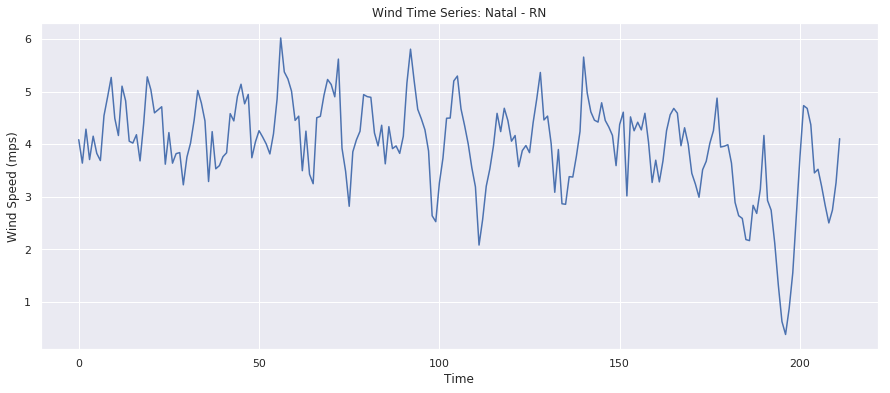

In [6]:
plt.plot(X1, y1)
plt.title('Wind Time Series: Natal - RN')
plt.xlabel('Time')
plt.ylabel('Wind Speed (mps)')

Pode-se obsevar no gráfico acima que o vento oscila no intervalo de um ano, indicando períodos com incidência de ventos mais fortes. Há uma leve tendência de queda ao longo dos anos, afetada principalmente pela baixa no ano de 2017 (próximo ao valor 200 no eixo horizontal da série). 

Porém, a queda brusca na velocidade média mensal pode ter ocorrido por causas técnicas. Os dados de velocidade média diária referentes ao ano de 2017, em boa parte, possuem valor próximo ou igual a zero. Possivelmente, dados faltantes foram preenchidos com o valor zero, podendo prejudicar a análise e previsão futura da série específica.

## Caso 1

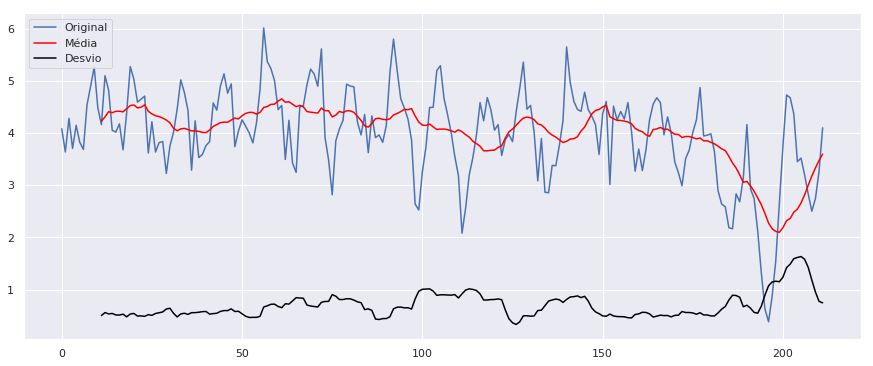

In [72]:
m_m1 = y1.rolling(window=12).mean()
m_std1 = y1.rolling(window=12).std() 

orig1 = plt.plot(y1,label='Original')
mean1 = plt.plot(m_m1, color='red',label='Média')
std1 = plt.plot(m_std1, color='black',label='Desvio')
plt.legend(loc='upper left')
plt.show()

### Estimação de tendência (Médias móveis)

A janela utilizada para medir a média contém 12 valores (representando 1 ano).

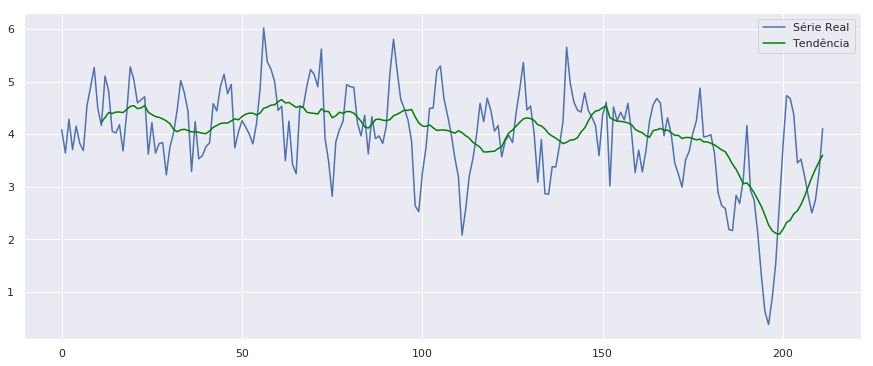

In [73]:
X1 = [i for i in range(0, len(y1))]
X1 = np.reshape(X1, (len(X1), 1))
rolling1 = y1.rolling(window=12)
media_mov1 = rolling1.mean()

tendencia1 = media_mov1

plt.plot(y1, label='Série Real')
plt.plot(tendencia1,color='green', label='Tendência' )
plt.legend(loc='best')
plt.show()

### Eliminação de tendência

In [74]:
serie_sem_tendencia1 = y1 - tendencia1

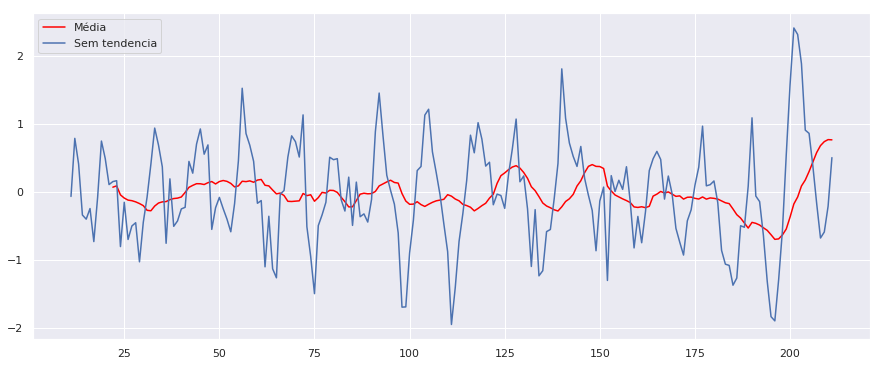

In [75]:
m_m1 = serie_sem_tendencia1.rolling(window=12).mean()
mean1 = plt.plot(m_m1, color='red',label='Média')
plt.plot(serie_sem_tendencia1, label='Sem tendencia')
plt.legend(loc='best')
plt.show()

### Estimação de sazonalidade (Médias móveis)

Já para a sazonalidade, a janela contém 2 valores, sendo a que melhor se ajustou visualmente à sazonalidade da série.

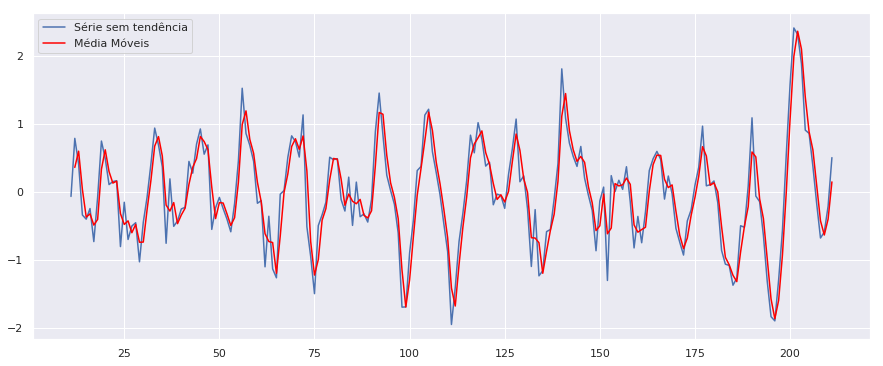

In [76]:
rolling1 = serie_sem_tendencia1.rolling(window=2)
saz_mean_mov1 = rolling1.mean()

plt.plot(serie_sem_tendencia1, label='Série sem tendência')
plt.plot(saz_mean_mov1,color='red', label='Média Móveis')
plt.legend(loc='best')
plt.show()

### Eliminação de sazonalidade

In [77]:
serie_residuo1 = serie_sem_tendencia1 - saz_mean_mov1 

### Ruído

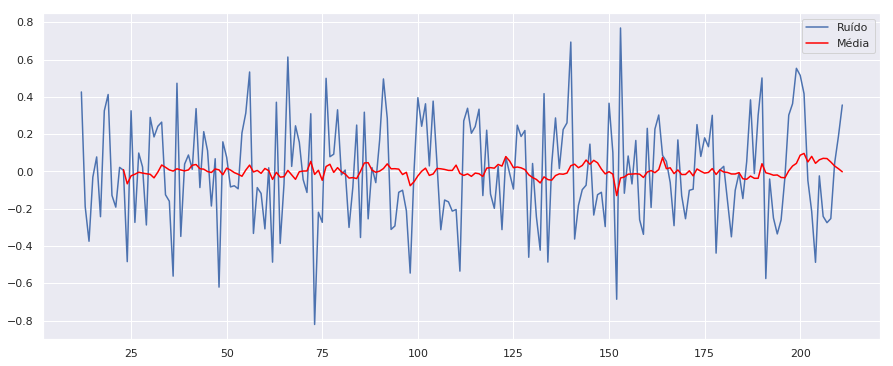

In [93]:
# Case 1
m_m1 = serie_residuo1.rolling(window=12).mean()
plt.plot(serie_residuo1, label='Ruído')
mean1 = plt.plot(m_m1, color='red',label='Média')
plt.legend(loc='best')
plt.show()

## Caso 2

### Estimação de tendência (Suavização exponencial)

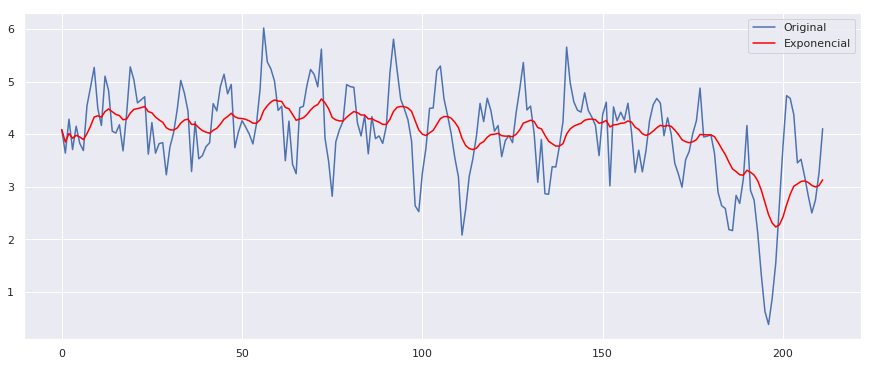

In [94]:
rolling2 =  y1.ewm(alpha =0.1)
suav_exp = rolling2.mean()
plt.plot(y1, label='Original')
plt.plot(suav_exp,color='red', label='Exponencial')
plt.legend(loc='best')
plt.show()

### Eliminação de tendência

In [80]:
serie_sem_tendencia = y1 - suav_exp  # Série - componente de tendência

### Estimação de sazonalidade (Médias móveis)

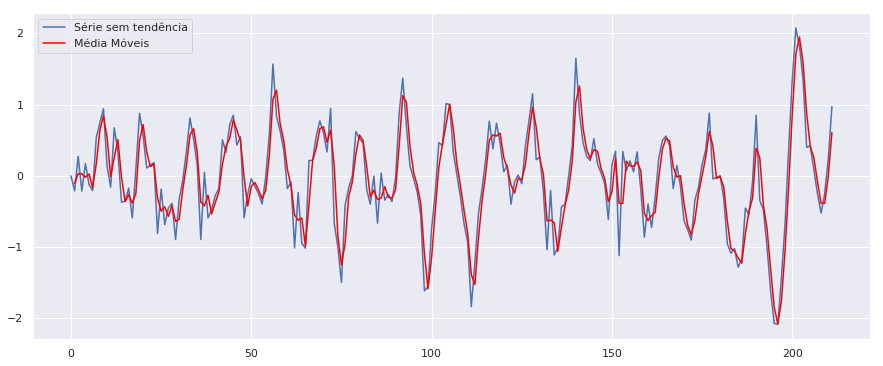

In [81]:
rolling = serie_sem_tendencia.rolling(window=2)
saz_mean_mov = rolling.mean()

plt.plot(serie_sem_tendencia, label='Série sem tendência')
plt.plot(saz_mean_mov,color='red', label='Média Móveis')
plt.legend(loc='best')
plt.show()

### Eliminação de sazonalidade

In [82]:
serie_residuo = serie_sem_tendencia - saz_mean_mov #Elimina o componente de sazonalidade

### Ruído

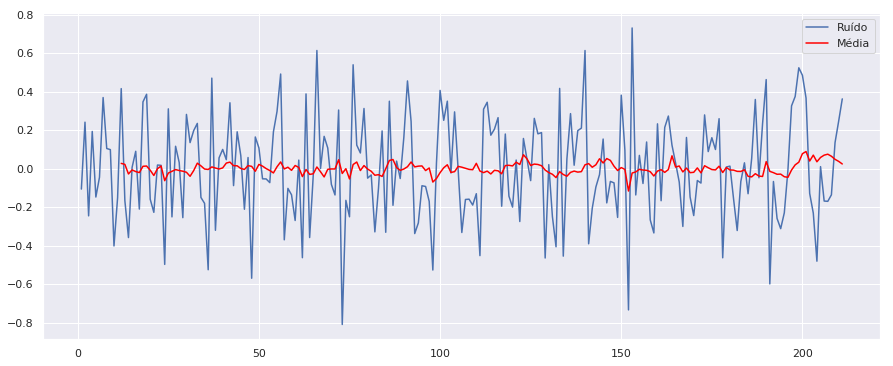

In [92]:
m_m = serie_residuo.rolling(window=12).mean()
plt.plot(serie_residuo, label='Ruído')
mean = plt.plot(m_m, color='red',label='Média')
plt.legend(loc='best')
plt.show()

## Caso 3

### Eliminação de tendência (Diferenciação)

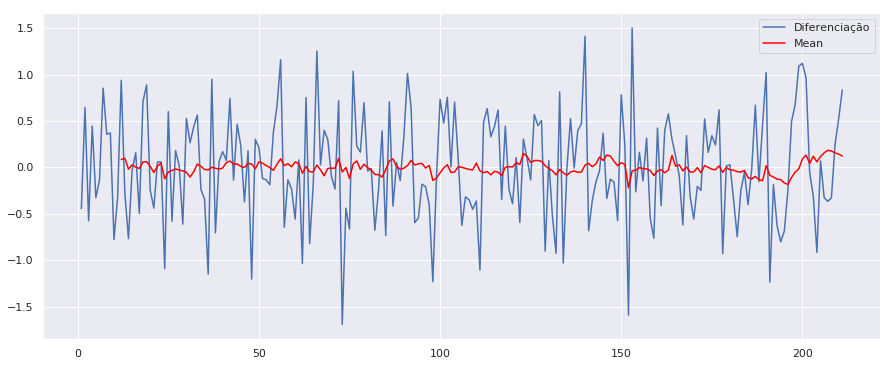

In [84]:
## de forma mais simples
serie_diff_pd = y1 - y1.shift()

m_m = serie_diff_pd.rolling(window=12).mean()
plt.plot(serie_diff_pd, label='Diferenciação')
mean = plt.plot(m_m, color='red',label='Mean')
plt.legend(loc='best')
plt.show()

In [85]:
ruido_1 = serie_residuo1
ruido_2 = serie_residuo
ruido_3 = serie_diff_pd

# Análise do ruído

Aplicadas as técnicas de eliminação de tendência e sazonalidade, verifica-se que os ruídos são semelhantes. Porém, no correlograma do caso 1 existem sete pontos [4, 5, 6, 7, 8, 9, 11] que indicam correlação com o primeiro valor da janela, enquanto os casos 2 e 3 possuem os mesmos 6 pontos [4, 5, 6, 7, 8, 9].

Nenhuma técnica conseguiu eliminar completamente os componentes de tendência e sazonalidade da série, de modo a se obter um ruído branco. A melhor técnica, analisando visualmente os correlogramas, foi a de diferenciação.

## Caso 1

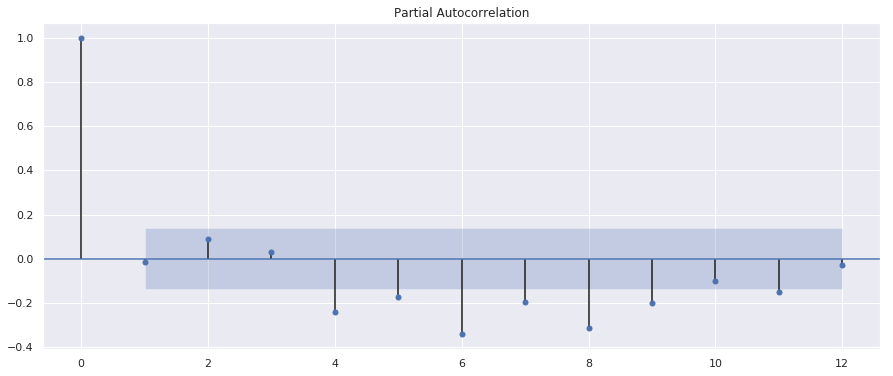

In [89]:
serie_residuo1.dropna(inplace=True)
case1 = smt.graphics.plot_pacf(serie_residuo1, lags=12, alpha=0.05)

## Caso 2

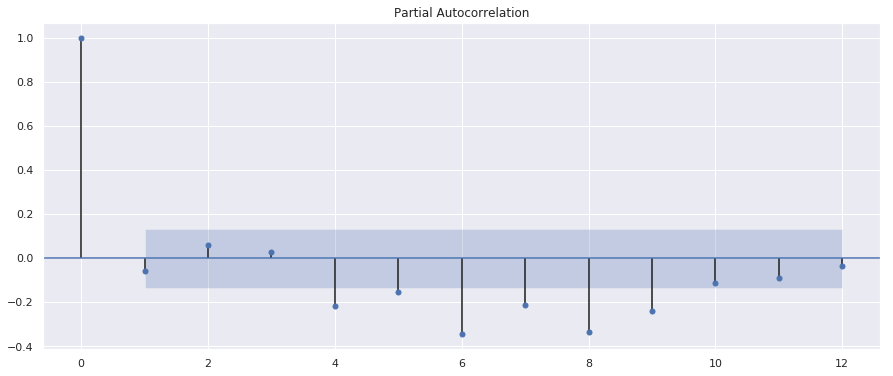

In [90]:
serie_residuo.dropna(inplace=True)
case2 = smt.graphics.plot_pacf(serie_residuo, lags=12, alpha=0.05)

## Caso 3

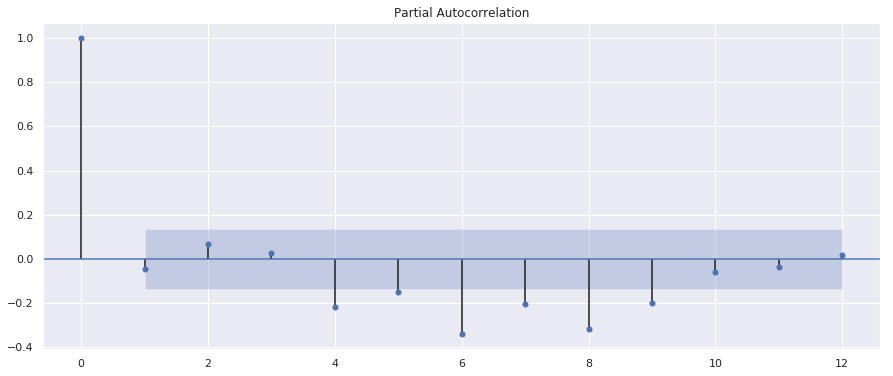

In [91]:
serie_diff_pd.dropna(inplace=True)
case3 = smt.graphics.plot_pacf(serie_diff_pd, lags=12, alpha=0.05)

# Série Temporal Financeira

## Dow Jones Industrial Average

O índice Dow Jones Industrial Average (DJIA) é ao lado do Nasdaq Composite e do Standard & Poor’s 500 um dos principais indicadores dos movimentos do mercado financeiro americano. Dos três indicadores, DJIA é o mais largamente publicado e discutido. O cálculo deste índice é bastante simples e é baseado na cotação das ações de 30 das maiores e mais importantes empresas dos Estados Unidos. 

Foram obtidos os dados diários da cotação do índice referentes ao período de 2000 até o ano corrente. Para a análise, foi selecionado o valor de fechamento diário.

Fonte: https://finance.yahoo.com/quote/%5EDJI/history/

In [28]:
financ_data = pd.read_csv('DJI.csv')
financ_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,11501.849609,11522.009766,11305.690430,11357.509766,11357.509766,169750000
1,2000-01-04,11349.750000,11350.059570,10986.450195,10997.929688,10997.929688,178420000
2,2000-01-05,10989.370117,11215.099609,10938.669922,11122.650391,11122.650391,203190000
3,2000-01-06,11113.370117,11313.450195,11098.450195,11253.259766,11253.259766,176550000
4,2000-01-07,11247.059570,11528.139648,11239.919922,11522.559570,11522.559570,184900000


In [29]:
dowjones = pd.Series(financ_data.Close.values)

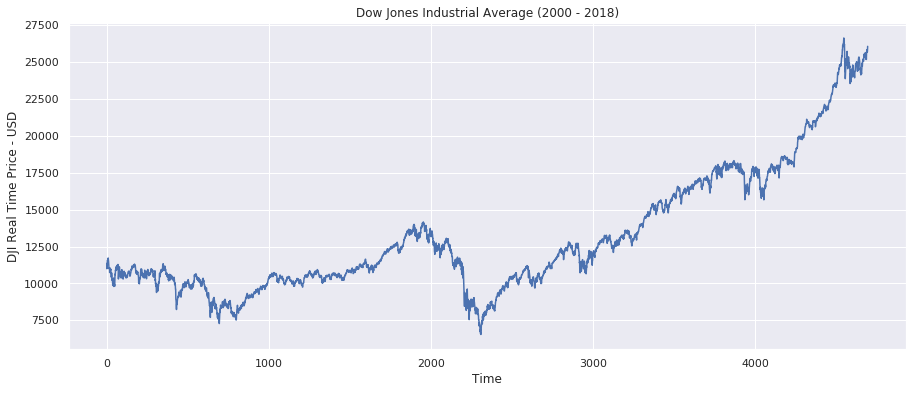

In [30]:
plt.plot(dowjones)
plt.xlabel('Time')
plt.ylabel('DJI Real Time Price - USD')
plt.title('Dow Jones Industrial Average (2000 - 2018)')
plt.show()

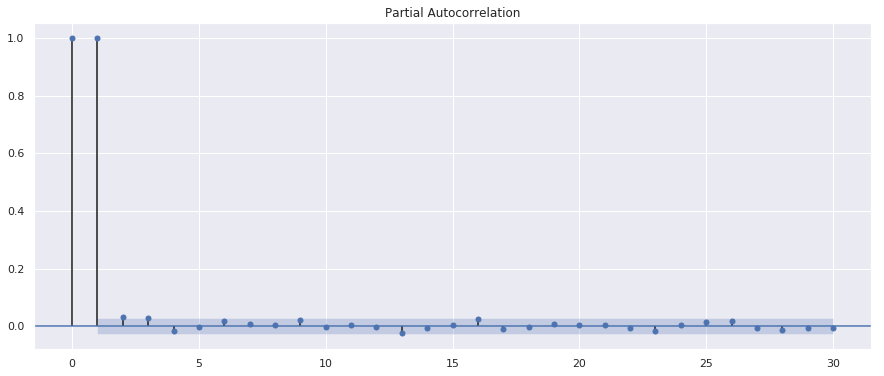

In [46]:
djia = smt.graphics.plot_pacf(dowjones, lags=30, alpha=0.05)

Analisando o correlograma acima, verifica-se a existência do <i>Random Walk</i> pelo fato de apenas o lag anterior possuir correlação com o tempo atual <i>t</i>. O restante dos pontos do correlograma, com significância de 95%, indicam ruído branco. Logo, como é caracterizado em um <i>Random Walk</i>, apenas o primeiro ponto anterior ao que se quer prever pode ser utilizado, enquanto o segundo componente da previsão é aleatório.